In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

%matplotlib inline

In [362]:
df=pd.read_csv('data/kc_cleaned_data.csv')
df.drop(columns=['id', 'date', 'yr_built', 'zipcode', 'yr_renovated'], inplace=True)

df = df.loc[df['price']<1_500_000]
df = df.loc[df['bedrooms']<6]
df = df.loc[df['bedrooms']>1]
df = df.loc[df['bathrooms']<5]
df = df.loc[df['sqft_living']<4000]
df = df.loc[df['sqft_above']<3500]
df = df.loc[df['sqft_basement']<1200]
df = df.loc[df['sqft_living15']<3000]
df = df.loc[df['grade']>2]
df = df.loc[df['sqft_lot']<30_000]
df = df.loc[df['sqft_lot15']<15_000]
df = df.loc[df['years_since_renovated']<40]
#df = df.loc[df['long']<-121.9]

df.to_csv('data/untransformed_data.csv', index=False)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,has_basement,is_cust_build,years_since_renovated
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,47.5112,-122.257,1340,5650,0,0,0.0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,47.7210,-122.319,1690,7639,1,0,29.0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,47.7379,-122.233,2720,8062,0,0,0.0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,47.5208,-122.393,1360,5000,1,0,0.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,47.6168,-122.045,1800,7503,0,0,0.0


# Visualizations

In [363]:
subset = df.drop(columns=['price', 'waterfront', 'has_basement', 'condition', 'floors', 'view', 'is_cust_build'])
subset.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,years_since_renovated
0,3,1.00,1180,5650,7,1180,0.0,47.5112,-122.257,1340,5650,0.0
1,3,2.25,2570,7242,7,2170,400.0,47.7210,-122.319,1690,7639,29.0
2,2,1.00,770,10000,6,770,0.0,47.7379,-122.233,2720,8062,0.0
3,4,3.00,1960,5000,7,1050,910.0,47.5208,-122.393,1360,5000,0.0
4,3,2.00,1680,8080,8,1680,0.0,47.6168,-122.045,1800,7503,0.0


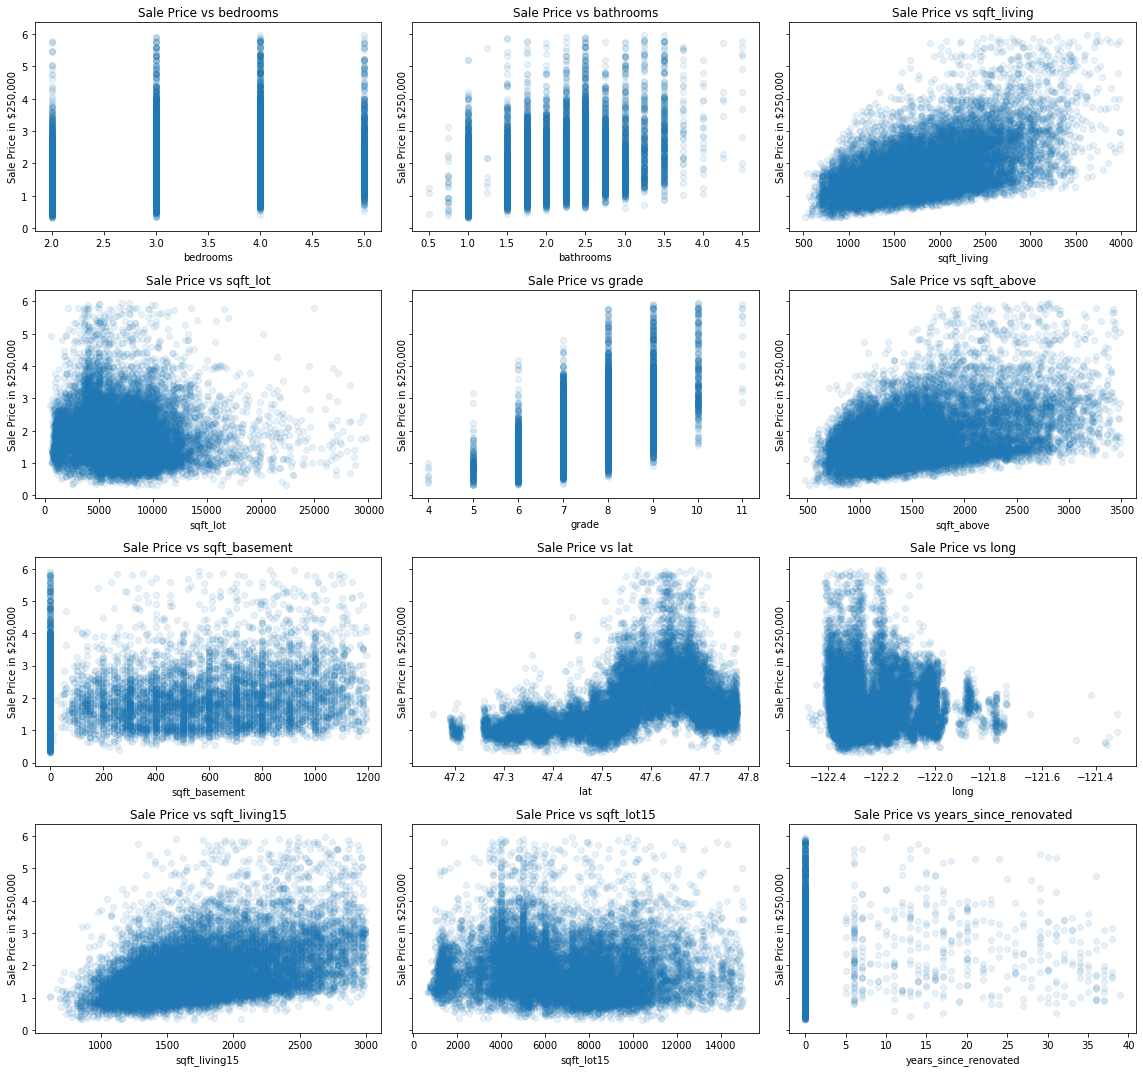

In [364]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), subset.columns):
    ax.scatter(subset[column], df['price'] / 250_000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $250,000')

fig.tight_layout()

### Grade

In [365]:
df_grade = df.copy()
df_grade = df_grade.loc[df_grade['grade'] <11]
df_grade = df_grade.loc[df_grade['price'] <2_000_000]
df_grade = df_grade.loc[df_grade['grade'] >5]

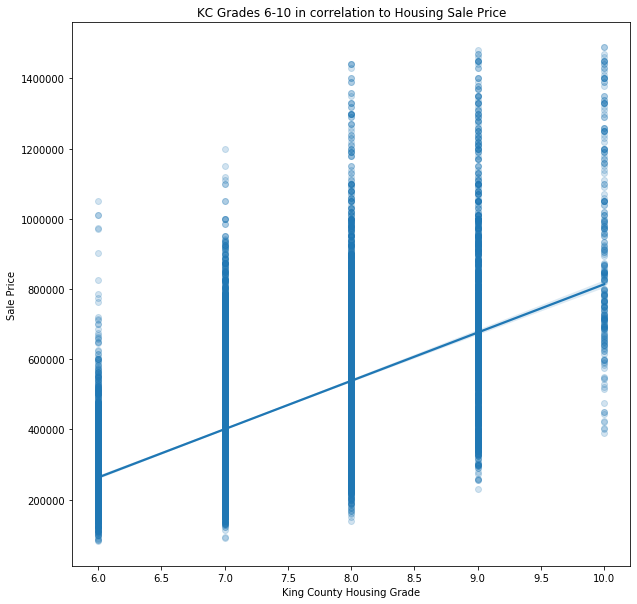

In [366]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title('KC Grades 6-10 in correlation to Housing Sale Price')
plt.xlabel('King County Housing Grade')
plt.ylabel('Sale Price')

sns.jointplot('grade','price', ax=ax, data=df_grade, kind='reg', joint_kws = {'scatter_kws':dict(alpha=0.2)});


plt.close(2)

In [367]:
res = sm.stats.multicomp.pairwise_tukeyhsd(df_grade['price'], df_grade['grade'])
print(res)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
     6      7  97614.7473 0.001    85275.01 109954.4846   True
     6      8 221626.5805 0.001 208604.2589 234648.9021   True
     6      9 403156.0218 0.001 386459.8727 419852.1709   True
     6     10 616641.3135 0.001 585237.0195 648045.6074   True
     7      8 124011.8331 0.001  115469.316 132554.3503   True
     7      9 305541.2745 0.001 292044.7885 319037.7605   True
     7     10 519026.5661 0.001 489200.0105 548853.1217   True
     8      9 181529.4413 0.001  167406.167 195652.7157   True
     8     10  395014.733 0.001 364899.3688 425130.0972   True
     9     10 213485.2917 0.001 181608.7219 245361.8614   True
--------------------------------------------------------------


In [368]:
ols = sm.OLS(df_grade['price'], df_grade['grade'])
res = ols.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.865
Model:                            OLS   Adj. R-squared (uncentered):              0.865
Method:                 Least Squares   F-statistic:                          1.042e+05
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        19:16:21   Log-Likelihood:                     -2.1956e+05
No. Observations:               16209   AIC:                                  4.391e+05
Df Residuals:                   16208   BIC:                                  4.391e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
grade       6.277e+04    194.436    322.810      0.000    6.24e+04    6.31e+04
==============================================================================
Omnibus:                     3909.530   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9506.386
Skew:                           1.337   Prob(JB):                         0.00
Kurtosis:                       5.632   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Features with High Correlation

In [369]:
feats = ['price', 'sqft_living', 'grade', 'sqft_above', 'bathrooms', 'bedrooms', 'sqft_basement', 'floors']

In [370]:
corr = df[feats].corr()

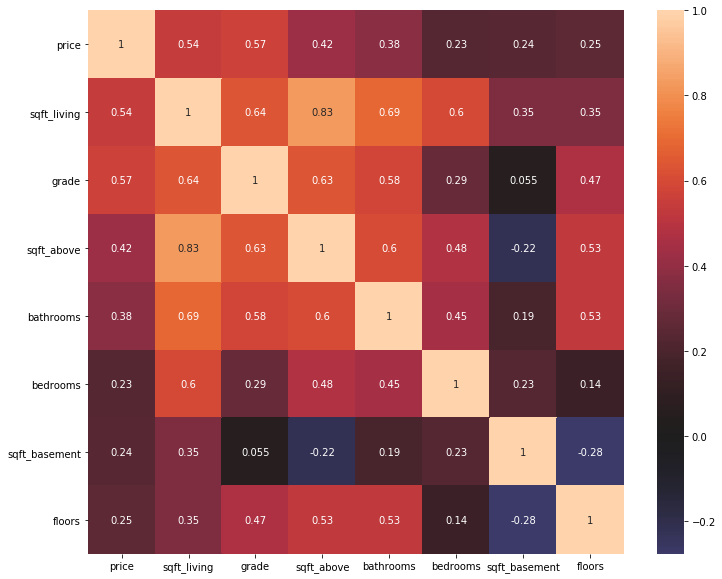

In [371]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, center=0, annot=True);

# Transformed DF

In [372]:
trans_df = df.copy()

In [373]:
log_lat= np.log(df['lat'])
trans_df['lat']= log_lat

df['long'] = df['long'].abs()
log_long= np.log(df['long'])
trans_df['long']=log_long

log_sqft_living = np.log(df['sqft_living'])
trans_df['sqft_living'] = log_sqft_living

log_sqft_lot = np.log(df['sqft_lot'])
trans_df['sqft_lot'] = log_sqft_lot

log_sqft_living15 = np.log(df['sqft_living15'])
trans_df['sqft_living15'] = log_sqft_living15

log_sqft_lot15 = np.log(df['sqft_lot15'])
trans_df['sqft_lot15'] = log_sqft_lot15

log_sqft_above = np.log(df['sqft_above'])
trans_df['sqft_above'] = log_sqft_above

log_price = np.log(df['price'])
trans_df['price'] = log_price

In [374]:
trans_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,has_basement,is_cust_build,years_since_renovated
0,12.309982,3,1.00,7.073270,8.639411,1.0,0.0,0.0,3,7,7.073270,0.0,3.860965,4.806125,7.200425,8.639411,0,0,0.0
1,13.195614,3,2.25,7.851661,8.887653,2.0,0.0,0.0,3,7,7.682482,400.0,3.865372,4.806632,7.432484,8.941022,1,0,29.0
2,12.100712,2,1.00,6.646391,9.210340,1.0,0.0,0.0,3,6,6.646391,0.0,3.865726,4.805929,7.908387,8.994917,0,0,0.0
3,13.311329,4,3.00,7.580700,8.517193,1.0,0.0,0.0,5,7,6.956545,910.0,3.861168,4.807237,7.215240,8.517193,1,0,0.0
4,13.142166,3,2.00,7.426549,8.997147,1.0,0.0,0.0,3,8,7.426549,0.0,3.863186,4.804390,7.495542,8.923058,0,0,0.0


In [375]:
trans_df.to_csv('data/transformed_data.csv', index=False)

# WORK DOWN FROM HERE



# Exploration of Features

In [376]:
cols = ['view', 'waterfront', 'has_basement', 'years_since_renovated', 'grade', 'sqft_living15']

In [377]:
df_samp = df[cols]
df_samp.head()

,view,waterfront,has_basement,years_since_renovated,grade,sqft_living15
0,0.0,0.0,0,0.0,7,1340
1,0.0,0.0,1,29.0,7,1690
2,0.0,0.0,0,0.0,6,2720
3,0.0,0.0,1,0.0,7,1360
4,0.0,0.0,0,0.0,8,1800


In [378]:
X = df_samp[cols]
#X = sm.add_constant(X)
y = df['price']

In [379]:
%store X
%store y

Stored 'X' (DataFrame)
Stored 'y' (Series)


In [380]:
ols = sm.OLS(y, X)
results = ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                          2.051e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        19:16:27   Log-Likelihood:                     -2.2091e+05
No. Observations:               16393   AIC:                                  4.418e+05
Df Residuals:                   16387   BIC:                                  4.419e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
view                    6.69e+04   2525.793     26.485      0.000    6.19e+04    7.18e+04
waterfront             1.414e+05   3.72e+04      3.804      0.000    6.85e+04    2.14e+05
has_basement            6.21e+04   2806.911     22.126      0.000    5.66e+04    6.76e+04
years_since_renovated  5026.5261    408.408     12.308      0.000    4226.002    5827.051
grade                  3.798e+04    864.967     43.915      0.000    3.63e+04    3.97e+04
sqft_living15            82.7860      3.453     23.975      0.000      76.018      89.554
==============================================================================
Omnibus:                     3727.848   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9351.733
Skew:                           1.247   Prob(JB):                         0.00
Kurtosis:                       5.733   Cond. No.                     5.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [381]:
# Want low JB
# Condition # indicates multicollinearity

## Residuals

In [382]:
residuals = results.resid

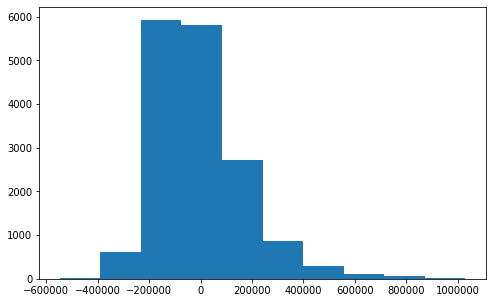

In [383]:
plt.figure(figsize=(8, 5))
plt.hist(residuals)
plt.show()

In [384]:
x = np.linspace(0, 1, len(residuals))

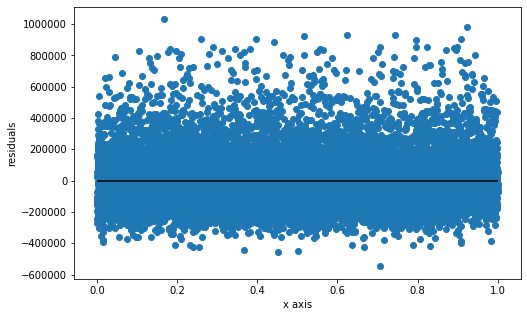

In [385]:
plt.figure(figsize=(8, 5))
plt.scatter(x, residuals)
plt.xlabel('x axis')
plt.ylabel('residuals')
plt.hlines(xmin=0, xmax=1, y=0, label='y_hat')
plt.show()

In [386]:
stats.kstest(stats.zscore(residuals), 'norm', args=(0,1))

KstestResult(statistic=0.06996037294012347, pvalue=4.0736605614190886e-70)

In [387]:
stats.shapiro(residuals)

C:\Users\kekay\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9289063215255737, 0.0)

# Random Shit

In [123]:
X = df[['view', 'waterfront', 'has_basement', 'years_since_renovated', 'grade', 'sqft_living15']]
y = df['price']

In [ ]:
def norm_feat(series):
    return (series - series.mean())/series.std()
for feat in ['is_cust_build', 'grade', 'view', 'waterfront', 
             'lat', 'long', 'sqft_living', 'bedrooms', 'bathrooms', 
             'floors', 'sqft_living15', 'sqft_above']:
    df_high_corr_and_location[feat] = norm_feat(df_high_corr_and_location[feat])
df_high_corr_and_location.head()

In [ ]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

df = df.drop(columns=['id'])
df.condition.value_counts(),sort_index().plot('bar')
df.groupby('condition').agg('std')['price']
df['condition3'] = df.condition.apply(lambda x: 1 if x >=3 else 0)

res = statsmodels.stats.multicomp.pairwise_tukeyhsd(df['price'], df['condition']) (29:30)

ols = sm.OLS(df['price'], df['condition'])
res = ols.fit()
res.summary()

sns.lmplot(x='condition', y='price', data=df, scatter_kws={"alpha":0.3})
plt.scatter(x=np.arange(1,6), y=np.arange(1,6)*151400(coef)*, c='r')
plt.show()

In [ ]:
df_cat = pd.get_dummies(df, columns=['condition'], drop_first=True)
df_cat


kurtosis check fisher = True??? near 0

In [ ]:
np.log(247999.99376351456)
np.exp(12.421184)

# Optional Combos

In [ ]:
['view', 'waterfront', 'has_basement', 'is_cust_build', 'years_since_renovated', 'grade']
#drop anything outside of 3stds